In [10]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.colors import ListedColormap

from classification import Perceptron


In [2]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pl.read_csv(s, has_header=False, new_columns=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]).drop_nulls()

In [3]:
df = df.filter(pl.col("class").is_in(["Iris-setosa", "Iris-versicolor"]))
df.shape

(100, 5)

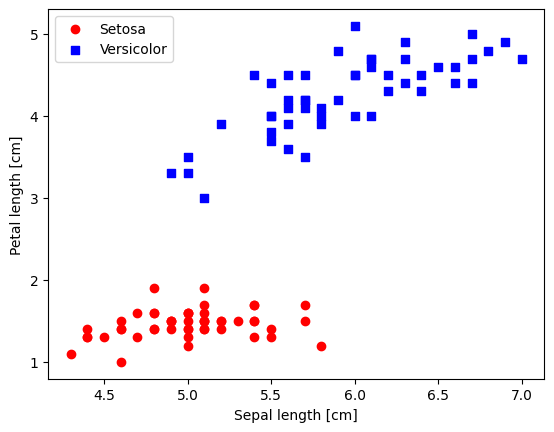

In [9]:
df_is = df.filter(pl.col("class")=="Iris-setosa")
df_iv = df.filter(pl.col("class")=="Iris-versicolor")
plt.scatter(df_is["sepal_length"], df_is["petal_length"], color="red", marker="o", label="Setosa")
plt.scatter(df_iv["sepal_length"], df_iv["petal_length"],color="blue", marker="s", label="Versicolor")

plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")

plt.show()

In [5]:
X = df.select(["sepal_length","petal_length"]).to_numpy()
y = np.where(df["class"]=="Iris-setosa",0, 1)

ppn =Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

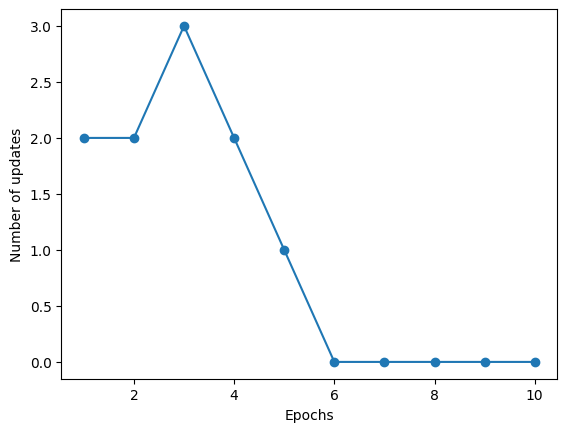

In [6]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Number of updates")
plt.show()

In [13]:
def plot_decision_regions(X, y, classifier:Perceptron, resolution:float= 0.02):
    # setup marker generator and color map
    marker = ("o", "s", "^", "v", "<")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha = 0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y==cl, 0],
            y=X[y==cl, 1],
            alpha=0.8,
            c = colors[idx],
            marker=marker[idx],
            label = f"Class {cl}",
            edgecolors="black"
        )

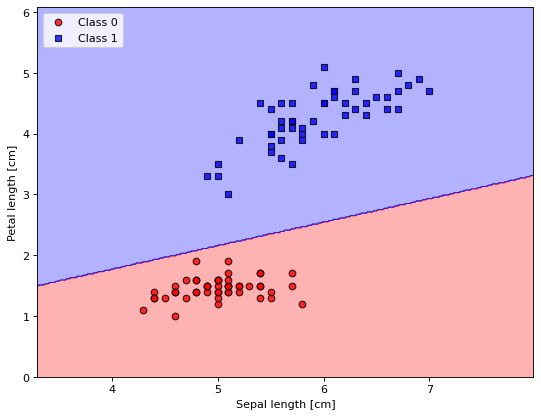

In [15]:
figure(figsize=(8, 6), dpi=80)
plot_decision_regions(X,y, ppn)
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.show()